In [ ]:
import sys
sys.path.append('..')
import numpy as np
import matplotlib.pyplot as plt
from metropolis import *
from tools import *
from tqdm import *
import pickle
# auto reload
%load_ext autoreload
%autoreload 2 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [36]:
not_scan = ""

# Test random gird

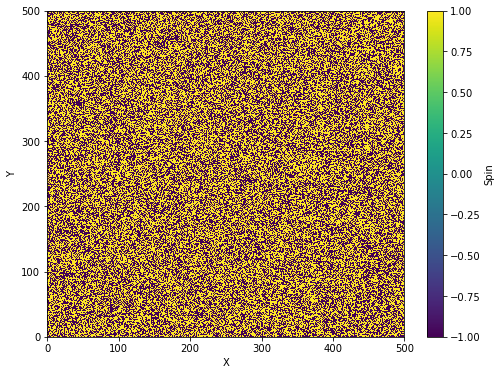

-0.00188


In [2]:
grid = np.random.choice([-1, 1], size=(500, 500))

plt.figure(figsize=(8, 6))
plt.pcolormesh(grid, cmap='viridis')
plt.colorbar(label='Spin')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

print(magnetization(grid))

### Define paramters

In [ ]:
T = 1.25; trials = len(grid)**2 * 50; B =.025; J =2
data = solve_metropolis(T, grid, trials, B, J)

 61%|█████████████████████████████████████████▎                          | 7586156/12500000 [27:01<1:24:46, 966.10it/s]

In [1]:
# Create separate plots for each set of data
for i, dataTable in enumerate(data[0], start=1):

    plt.figure(figsize=(6, 6))
    plt.pcolormesh(dataTable, cmap='viridis')
    plt.grid(True)
    plt.show()

NameError: name 'data' is not defined

In [ ]:
data[2]

In [ ]:
diff_grid = grid_difference(data[2][-1], data[2][-2])

plt.figure(figsize=(6, 6))
plt.pcolormesh(diff_grid, cmap='viridis')
plt.grid(True)
plt.show()

# Setup scan

### Create default grid

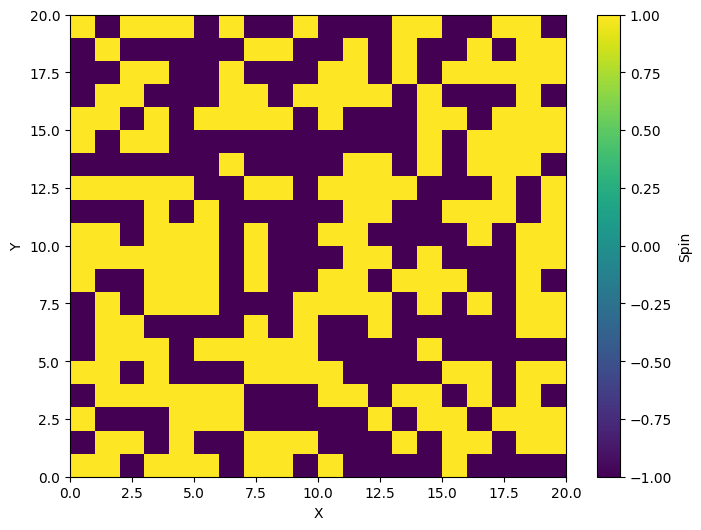

0.015


In [13]:
grid = np.random.choice([-1, 1], size=(20, 20))

plt.figure(figsize=(8, 6))
plt.pcolormesh(grid, cmap='viridis')
plt.colorbar(label='Spin')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

print(magnetization(grid))

In [44]:
index=1
pickle.dump(data, open(f"../default_grid/default_grid_{index}.pkl", "wb"))

In [15]:
J_scan = np.linspace(0,1, 10)
T = 1.25; trials = len(grid)**2 * 50; B =.025;
avgM_lst = []; avgE_lst=[]; avgE2_lst=[];Cv_lst=[]

for J in tqdm(J_scan):
    result = solve_metropolis(T, grid, trials, B, J)
    avgM_lst.append(result[2]["avg_M"])
    avgE_lst.append(result[2]["avg_E"])
    avgE2_lst.append(result[2]["avg_E2"])
    Cv_lst.append(result[2]["Cv"])

data = {
    "param": {"T":T, "trail": trials, "B":B, "scan": J_scan, "grid": grid},
    "avg_M": avgM_lst,
    "avg_E": avgE_lst,
    "avg_E2": avgE2_lst,
    "Cv": Cv_lst
}

100%|██████████| 10/10 [00:01<00:00,  6.19it/s]


#### Save data

In [18]:
pickle.dump(data, open(f"../Data/Test.pkl", "wb"))

#### Load data


In [49]:
filename = "Ising_scanJ_B_0.025_T_1.25_2.pkl"
data = pickle.load(open(f"../Data/"+filename, "rb"))

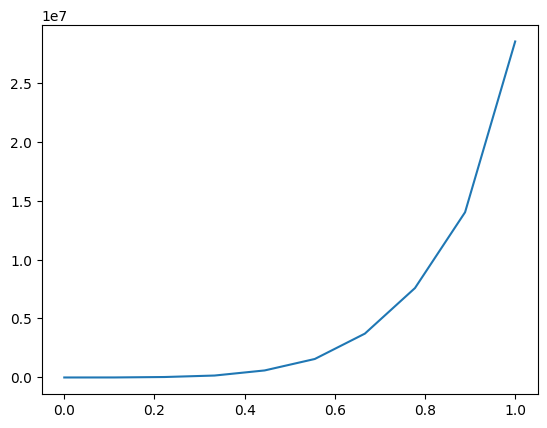

In [50]:
plt.plot(data["param"]["scan"], data["Cv"])

In [35]:
param = {"T":1, "trail": 2, "B":3, "J": 4, "grid": 5}
param?

Type:        dict
String form: {'T': 1, 'trail': 2, 'B': 3, 'J': 4, 'grid': 5}
Length:      5
Docstring:  
dict() -> new empty dictionary
dict(mapping) -> new dictionary initialized from a mapping object's
    (key, value) pairs
dict(iterable) -> new dictionary initialized as if via:
    d = {}
    for k, v in iterable:
        d[k] = v
dict(**kwargs) -> new dictionary initialized with the name=value pairs
    in the keyword argument list.  For example:  dict(one=1, two=2)

In [42]:
pickle.dump([0, "ababa.pkl"], open(f"../Data/ababa.pkl", "wb"))

In [43]:
pickle.load(open("../counts.pkl", "rb"))

[0, 'ababa.pkl']